# Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values.


It assumes that the data are missing completely at random(MCAR)

In [63]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [64]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [65]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [66]:
df['Age'].isnull().sum()

177

In [67]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [68]:
df['Age'].isnull().sum()

177

In [69]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [70]:
def impute_nan(df,variable,median):
    
    #Creates another new column (Age_random)
    df[variable+"_random"]=df[variable]
    
    #It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    
    #pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [71]:
median=df.Age.median()

In [72]:
median

28.0

In [75]:
#Ensuring there are no more null values in Age_random, because nan values are replaced with random sample values

df['Age_random'].isnull().sum()

0

In [74]:
impute_nan(df,"Age",median)

In [57]:
df.head()

,Survived,Age,Fare,Age_random
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

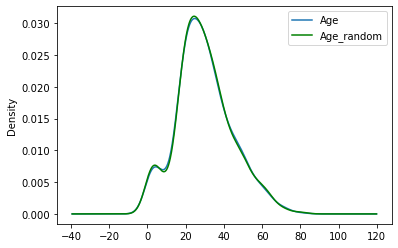

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')